# CIDS Carpentries Workshop - Day 1 - Part 5
This lesson is adapted from the Data Carpentries [Data Analysis and Visualization in Python for Ecologists](https://datacarpentry.org/python-ecology-lesson/index.html) lesson.

---
## How to use a Jupyter Notebook
Online Resources:
- https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/index.html
- https://code.visualstudio.com/docs/datascience/jupyter-notebooks 

Useful Tips:
- To save the notebook/file, <kbd>Ctrl</kbd> + <kbd>s</kbd> or Go to `File -> Save`.
- You run a cell with <kbd>Shift</kbd> + <kbd>Enter</kbd> or
    - **Jupyter Notebook, JupyterLab**: you can use the run button ▶ in the tool bar.
    - **VScode**: you can use the run button ▶ in front of the cell.
- If you run a cell with <kbd>Option (Alt)</kbd> + <kbd>Enter</kbd> it will also create a new cell below.
- If you opened this a classic notebook you can check *Help > Keyboard Shortcuts* else see the *Cheatsheet* for more info.
- If you are using VScode, See [Jupyter Notebooks in VS Code](https://code.visualstudio.com/docs/datascience/jupyter-notebooks) for more info.
- The notebook has different type of cells (Code and Markdown are most commonly used): 
    - **Code** cells expect code for the Kernel you have chosen, syntax highlighting is available, comments in the code are specified with `#` -> code after this will not be executed.
    - **Markdown** cells allow you to right report style text, using markdown for formatting the style (e.g. Headers, bold face etc).
---

## ❓Questions and Objectives for this Notebook
What should you be able to answer by the end of this notebook?

### Questions

- How can I work with data from multiple sources?
- How can I combine data from different data sets?

### Objectives

- Combine data from multiple files into a single DataFrame using merge and concat.
- Combine two DataFrames using a unique ID found in both DataFrames.
- Employ to_csv to export a DataFrame in CSV format.
- Join DataFrames using common fields (join keys).



In many “real world” situations, the data that we want to use come in multiple files. We often need to combine these files into a single DataFrame to analyze the data. The pandas package provides [various methods for combining DataFrames](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) including `merge` and `concat`.

To work through the examples below, we first need to load both the **species** and **surveys** files into pandas DataFrames as we have done in previous notebooks.  

This time however, we will use the **keyword arguments** `keep_default_na=False` with `na_values=[""]` , which will be explained shortly.

In [16]:
# import pandas
import pandas as pd

# load the "data/surveys.csv" dataframe into a python variable
surveys_df = pd.read_csv("../data/surveys.csv", keep_default_na=False, na_values=[""])

# print the data frame below to check the data
surveys_df


,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [17]:
# load the "data/species.csv" dataframe into a different python variable
species_df = pd.read_csv("../data/species.csv", keep_default_na=False, na_values=[""])

# print the data frame below to check the data
species_df

,species_id,genus,species,taxa
0,AB,Amphispiza,bilineata,Bird
1,AH,Ammospermophilus,harrisi,Rodent
2,AS,Ammodramus,savannarum,Bird
3,BA,Baiomys,taylori,Rodent
4,CB,Campylorhynchus,brunneicapillus,Bird
5,CM,Calamospiza,melanocorys,Bird
6,CQ,Callipepla,squamata,Bird
7,CS,Crotalus,scutalatus,Reptile
8,CT,Cnemidophorus,tigris,Reptile
9,CU,Cnemidophorus,uniparens,Reptile


As mentioned, take note that the `read_csv` method we used can take some additional options which we didn’t use previously. Many functions in Python have a set of options that can be set by the user if needed. In this case, we have told pandas to not assign NaN values with its default settings, but to then assign only empty values in our CSV to NaN: `keep_default_na=False, na_values=[""]`. More about all of the `read_csv` options [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv).  

If you ever have a method you're not sure how to use, or want to use in a particular way, a quick web search can often give you the answer!

# Concatenating DataFrames
We can use the concat function in pandas to append either columns or rows from one DataFrame to another. Let’s grab two subsets of our data to see how this works.

In [18]:
# Read in first 10 lines of surveys table
survey_sub = surveys_df.head(10)

# Grab the last 10 rows
survey_sub_last10 = surveys_df.tail(10)

# Reset the index values so the second dataframe appends properly
survey_sub_last10 = survey_sub_last10.reset_index(drop=True)
# We use the keyword drop=True here to avoid adding new index columns with old index values


In [19]:
# Have a look!
survey_sub_last10

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,35540,12,31,2002,15,PB,F,26.0,23.0
1,35541,12,31,2002,15,PB,F,24.0,31.0
2,35542,12,31,2002,15,PB,F,26.0,29.0
3,35543,12,31,2002,15,PB,F,27.0,34.0
4,35544,12,31,2002,15,US,NaN,NaN,NaN
5,35545,12,31,2002,15,AH,NaN,NaN,NaN
6,35546,12,31,2002,15,AH,NaN,NaN,NaN
7,35547,12,31,2002,10,RM,F,15.0,14.0
8,35548,12,31,2002,7,DO,M,36.0,51.0
9,35549,12,31,2002,5,NaN,NaN,NaN,NaN


When we concatenate DataFrames, we need to specify the axis. `axis=0` tells pandas to stack the second DataFrame UNDER the first one. It will automatically detect whether the column names are the same and will stack accordingly. `axis=1` will stack the columns in the second DataFrame to the RIGHT of the first DataFrame. To stack the data vertically, we need to make sure we have the same columns and associated column format in both datasets. When we stack horizontally, we want to make sure what we are doing makes sense (i.e. the data are related in some way).

In [20]:
# Stack the DataFrames on top of each other
vertical_stack = pd.concat([survey_sub, survey_sub_last10], axis=0)

# Place the DataFrames side by side
horizontal_stack = pd.concat([survey_sub, survey_sub_last10], axis=1)


In [21]:
# Have a look!
vertical_stack.reset_index(drop=True)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


In [24]:
horizontal_stack.reset_index(drop=True)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN,35540,12,31,2002,15,PB,F,26.0,23.0
1,2,7,16,1977,3,NL,M,33.0,NaN,35541,12,31,2002,15,PB,F,24.0,31.0
2,3,7,16,1977,2,DM,F,37.0,NaN,35542,12,31,2002,15,PB,F,26.0,29.0
3,4,7,16,1977,7,DM,M,36.0,NaN,35543,12,31,2002,15,PB,F,27.0,34.0
4,5,7,16,1977,3,DM,M,35.0,NaN,35544,12,31,2002,15,US,NaN,NaN,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN,35545,12,31,2002,15,AH,NaN,NaN,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN,35546,12,31,2002,15,AH,NaN,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN,35547,12,31,2002,10,RM,F,15.0,14.0
8,9,7,16,1977,1,DM,F,34.0,NaN,35548,12,31,2002,7,DO,M,36.0,51.0
9,10,7,16,1977,6,PF,F,20.0,NaN,35549,12,31,2002,5,NaN,NaN,NaN,NaN


# Row Index Values and Concat

Had a look at the `vertical_stack` dataframe? Notice anything unusual? The row indexes for the two data frames `survey_sub` and `survey_sub_last10` have been repeated. We can reindex the new dataframe using the `reset_index()` method as before.

# Writing Out Data to CSV

We can use the to_csv command to do export a DataFrame in CSV format. Note that the code below will by default save the data into the current working directory. We can save it to a different folder by adding the foldername and a slash to the file vertical_stack.to_csv('foldername/out.csv'). We use the ‘index=False’ so that pandas doesn’t include the index number for each line.

In [26]:
# Write DataFrame to CSV
vertical_stack.to_csv('../data/out.csv', index=False)

Check out your working directory to make sure the CSV wrote out properly, and that you can open it!   

If you want, try to bring it back into Python to make sure it imports properly.

In [27]:
# For kicks read our output back into Python and make sure all looks good
new_output = pd.read_csv('../data/out.csv', keep_default_na=False, na_values=[""])

### ✏️ Challenge - Combine Data:
In the data folder, there are two survey data files: surveys2001.csv and surveys2002.csv. Your tasks are:

1. Read the data into Python 
2. Combine the files to make one new data frame. 
3. Create a plot of average plot weight by year grouped by sex. 
4. Export your results as a CSV 
5. Make sure the fiel you exported reads back into Python properly.

In [28]:
# Read the files
survey2001 = pd.read_csv('../data/surveys2001.csv', keep_default_na=False, na_values=[""])
survey2002 = pd.read_csv('../data/surveys2002.csv', keep_default_na=False, na_values=[""])

In [29]:
# Concatenate the files
survey_all = pd.concat([survey2001, survey2002], axis=0)

In [38]:
# Get the weight for each year, grouped by sex
weight_year = survey_all.groupby(['year', 'sex'])['weight'].mean()
weight_year

year  sex
2001  F      36.034771
      M      36.404196
2002  F      33.878761
      M      37.490506
Name: weight, dtype: float64

In [39]:
# Unstack 
weight_year = weight_year.unstack()
weight_year

sex,F,M
year,,
2001,36.034771,36.404196
2002,33.878761,37.490506


<Axes: xlabel='year'>

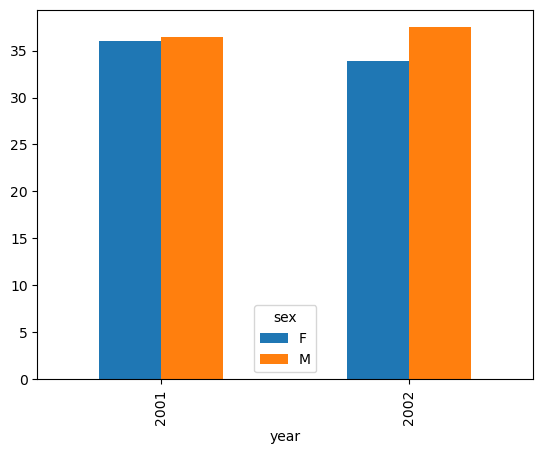

In [42]:
# Plotting the data
weight_year.plot(kind='bar')

In [43]:
# Writing ato a file
weight_year.to_csv('../data/weight_year.csv', index=False)

In [47]:
# Reading it back in
pd.read_csv("../data/weight_year.csv", index_col=0)

,M
F,
36.034771,36.404196
33.878761,37.490506


# Joining DataFrames

When we concatenated our DataFrames we simply added them to each other - stacking them either vertically or side by side. Another way to combine DataFrames is to use columns in each dataset that contain common values (a common unique id). Combining DataFrames using a common field is called “joining”. The columns containing the common values are called “join key(s)”. Joining DataFrames in this way is often useful when one DataFrame is a “lookup table” containing additional data that we want to include in the other.

NOTE: This process of joining tables is similar to what we do with tables in an SQL database.

For example, the species.csv file that we’ve been working with is a lookup table. This table contains the genus, species and taxa code for 55 species. The species code is unique for each line. These species are identified in our survey data as well using the unique species code. Rather than adding 3 more columns for the genus, species and taxa to each of the 35,549 line Survey data table, we can maintain the shorter table with the species information. When we want to access that information, we can create a query that joins the additional columns of information to the Survey data.

Storing data in this way has many benefits including:

1. It ensures consistency in the spelling of species attributes (genus, species and taxa) given each species is only entered once. Imagine the possibilities for spelling errors when entering the genus and species thousands of times!
2. It also makes it easy for us to make changes to the species information once without having to find each instance of it in the larger survey data.
3. It optimizes the size of our data.



# Joining Two DataFrames
To better understand joins, let’s grab the first 10 lines of our data as a subset to work with. We’ll use the .head method to do this. We’ll also read in a subset of the species table.

In [48]:
# Grab in first 10 lines of the surveys table we loaded in earlier (surveys_df)
surveys_sub = surveys_df.head(10)

# Import a small subset of the species data designed for this part of the lesson.
# It is stored in the data folder.
# Again, use the keywords keep_default_na=False, na_values=[""]
species_sub = pd.read_csv('../data/speciesSubset.csv', keep_default_na=False, na_values=[""])

In this example, `species_sub` is the lookup table containing genus, species, and taxa names that we want to join with the data in `survey_sub` to produce a new DataFrame that contains all of the columns from both `species_df` and survey_df.

# Identifying join keys
To identify appropriate join keys we first need to know which field(s) are shared between the files (DataFrames). We might inspect both DataFrames to identify these columns. If we are lucky, both DataFrames will have columns with the same name that also contain the same data.   

If we are less lucky, we need to identify a (differently-named) column in each DataFrame that contains the same information.

In [49]:
# Visualise species_sub columns
species_sub.columns

Index(['species_id', 'genus', 'species', 'taxa'], dtype='object')

In [50]:
# View surveys_sub columns
surveys_sub.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In our example, the join key is the column containing the two-letter species identifier, which is called species_id.

Now that we know the fields with the common species ID attributes in each DataFrame, we are almost ready to join our data. However, since there are [different types of joins](https://blog.codinghorror.com/a-visual-explanation-of-sql-joins/), we also need to decide which type of join makes sense for our analysis.

# Inner joins
The most common type of join is called an inner join. An inner join combines two DataFrames based on a join key and returns a new DataFrame that contains **only** those rows that have matching values in both of the original DataFrames.

Inner joins yield a DataFrame that contains only rows where the value being joined exists in BOTH tables. An example of an inner join, adapted from [Jeff Atwood’s blogpost about SQL joins](https://blog.codinghorror.com/a-visual-explanation-of-sql-joins/), is below:

![An inner join between two tables](../pictures/inner-join.png "An inner join between two tables")

The pandas function for performing joins is called `merge` and an Inner join is the default option:


In [51]:
# Do an inner merge of "survey_sub" and "species_sub", store the result to "merged_inner"
# In this case `species_id` is the only column name in  both dataframes, so if we skipped `left_on`
# And `right_on` arguments we would still get the same result
merged_inner = pd.merge(left=survey_sub, right=species_sub, left_on='species_id', right_on='species_id')

In [52]:
# What's the size of the output data?
merged_inner.shape

(8, 12)

In [53]:
# View the dataframe
merged_inner

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
5,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
6,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent
7,7,7,16,1977,2,PE,F,NaN,NaN,Peromyscus,eremicus,Rodent


The result of an inner join of `survey_sub` and `species_sub` is a new DataFrame that contains the combined set of columns from `survey_sub` and `species_sub`. It only contains rows that have two-letter species codes that are the same in both the `survey_sub` and `species_sub` DataFrames. In other words, if a row in `survey_sub` has a value of `species_id` that does not appear in the `species_id` column of species, it will not be included in the DataFrame returned by an inner join. Similarly, if a row in `species_sub` has a value of `species_id` that does not appear in the species_id column of `survey_sub`, that row will not be included in the DataFrame returned by an inner join.

The two DataFrames that we want to join are passed to the merge function using the left and right argument. The `left_on='species'` argument tells merge to use the `species_id` column as the join key from `survey_sub` (the left DataFrame). Similarly , the `right_on='species_id'` argument tells merge to use the `species_id` column as the join key from `species_sub` (the right DataFrame). For inner joins, the order of the left and right arguments does not matter.

The result `merged_inner` DataFrame contains all of the columns from `survey_sub` (record id, month, day, etc.) as well as all the columns from `species_sub` (species_id, genus, species, and taxa).

Notice that `merged_inner` has fewer rows than `survey_sub`. This is an indication that there were rows in surveys_df with value(s) for `species_id` that do not exist as value(s) for `species_id` in `species_df`.

# Left joins

What if we want to add information from `species_sub` to `survey_sub` without losing any of the information from `survey_sub`? In this case, we use a different type of join called a “left outer join”, or a “left join”.

Like an inner join, a left join uses join keys to combine two DataFrames. Unlike an inner join, a `left` join will return all of the rows from the left DataFrame, even those rows whose join key(s) do not have values in the `right` DataFrame. Rows in the `left` DataFrame that are missing values for the join key(s) in the `right` DataFrame will simply have null (i.e., NaN or None) values for those columns in the resulting joined DataFrame.

Note: a left join will still discard rows from the `right` DataFrame that do not have values for the join key(s) in the `left` DataFrame.


![An left join between two tables](../pictures/left-join.png "An left join between two tables")

A left join is performed in pandas by calling the same merge function used for inner join, but using the `how='left'` argument:

In [54]:
# Create "merged_left", a left merge of "survey_sub" (left) and "species_sub" right
merged_left = pd.merge(left=survey_sub, right=species_sub, how='left', left_on='species_id', right_on='species_id')

# Now check what we've done
merged_left

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
5,6,7,16,1977,1,PF,M,14.0,NaN,NaN,NaN,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN,Peromyscus,eremicus,Rodent
7,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
8,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent
9,10,7,16,1977,6,PF,F,20.0,NaN,NaN,NaN,NaN


The result DataFrame from a left join (`merged_left`) looks very much like the result DataFrame from an inner join (`merged_inner`) in terms of the columns it contains. However, unlike `merged_inner`, `merged_left` contains the same number of rows as the original `survey_sub` DataFrame. When we inspect `merged_left`, we find there are rows where the information that should have come from `species_sub` (i.e., `species_id`, `genus`, and `taxa`) is missing (they contain NaN values):



In [55]:
# Check merged_left where the values of "genus" are null
merged_left[merged_left['genus'].isnull()]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
5,6,7,16,1977,1,PF,M,14.0,NaN,NaN,NaN,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN,NaN,NaN,NaN


These rows are the ones where the value of `species_id` from `survey_sub` (in this case, PF) does not occur in `species_sub`.

Other join types

The pandas `merge` function supports two other join types:

 - Right (outer) join: Invoked by passing `how='right'` as an argument. Similar to a left join, except all rows from the `right` DataFrame are kept, while rows from the `left` DataFrame without matching join key(s) values are discarded.
 - Full (outer) join: Invoked by passing `how='outer'` as an argument. This join type returns the all pairwise combinations of rows from both DataFrames; i.e., the result DataFrame will be `NaN` where data is missing in one of the dataframes. 


# 🔥 Final Challenges for this Notebook 🔥
## ✏️  Challenge 1. Distributions
Create a new DataFrame by joining the contents of the surveys.csv and species.csv tables. Then calculate and plot the distribution of:
1. `taxa` by `plot`
2. `taxt` by `sex` by `plot`

In [60]:
import matplotlib.pyplot as plt

In [56]:
merged_left = pd.merge(left=surveys_df,right=species_df, how='left', on="species_id")

<Axes: xlabel='plot_id'>

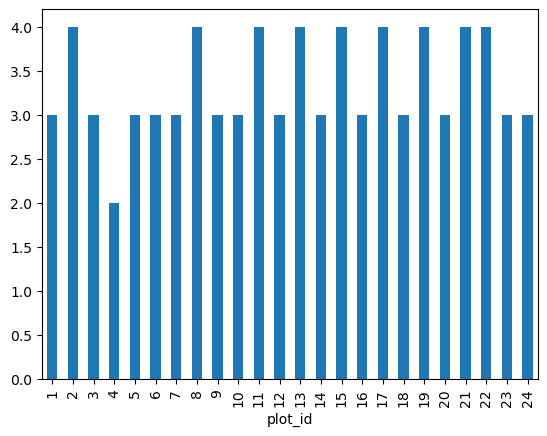

In [57]:
merged_left.groupby(["plot_id"])["taxa"].nunique().plot(kind='bar')

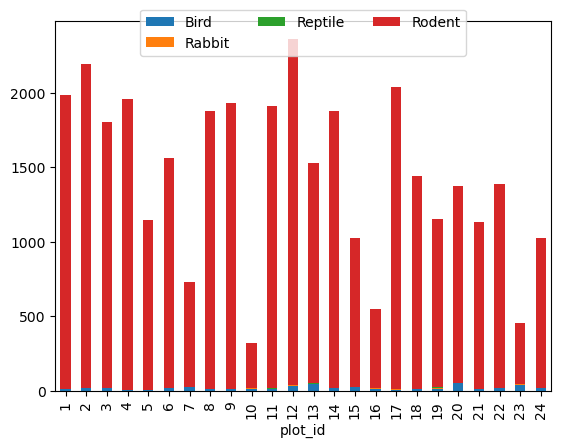

In [61]:
merged_left.groupby(["plot_id", "taxa"]).count()["record_id"].unstack().plot(kind='bar', stacked=True)
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05)) # stop the legend from overlapping with the bar plot

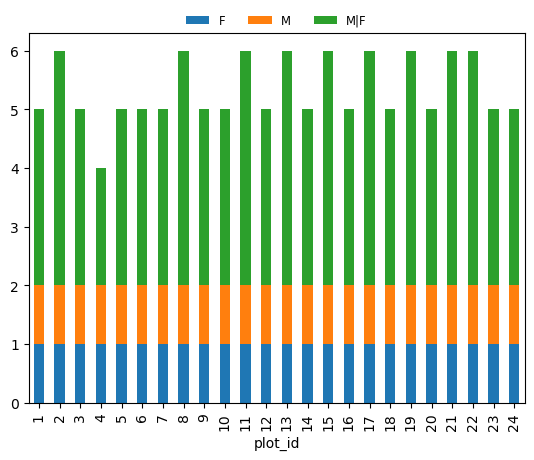

In [62]:
merged_left.loc[merged_left["sex"].isnull(), "sex"] = 'M|F'
ntaxa_sex_site= merged_left.groupby(["plot_id", "sex"])["taxa"].nunique().reset_index(level=1)
ntaxa_sex_site = ntaxa_sex_site.pivot_table(values="taxa", columns="sex", index=ntaxa_sex_site.index)
ntaxa_sex_site.plot(kind="bar", legend=False, stacked=True)
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.08),
           fontsize='small', frameon=False)

## ✏️  Challenge 2. Diversity Index

In the data folder, there is a plots.csv file that contains information about the type associated with each plot. 

1. Use that data to summarize the number of plots by plot type.

2. Calculate a diversity index of your choice for control vs rodent exclosure plots. The index should consider both species abundance and number of species. You might choose to use the simple biodiversity index described [here](https://www.amnh.org/learn-teach/curriculum-collections/biodiversity-counts/plant-ecology/how-to-calculate-a-biodiversity-index) which calculates diversity as:

        Biodiversity index. = The number of species in the plot / the total number of individuals in the plot 

Your final plot should be of plot_id (y axis) vs diversity index (x axis)

In [64]:
plot_info = pd.read_csv("../data/plots.csv")
plot_info.groupby("plot_type").count()

,plot_id
plot_type,
Control,8
Long-term Krat Exclosure,4
Rodent Exclosure,6
Short-term Krat Exclosure,4
Spectab exclosure,2


In [67]:
merged_site_type = pd.merge(merged_left, plot_info, on='plot_id')
merged_site_type

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa,plot_type
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent,Control
1,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent,Control
2,7,7,16,1977,2,PE,F,NaN,NaN,Peromyscus,eremicus,Rodent,Control
3,18,7,16,1977,2,PP,M,22.0,NaN,Chaetodipus,penicillatus,Rodent,Control
4,69,8,19,1977,2,PF,M,15.0,8.0,Perognathus,flavus,Rodent,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35544,35072,11,9,2002,24,PB,F,25.0,24.0,Chaetodipus,baileyi,Rodent,Rodent Exclosure
35545,35283,12,7,2002,24,PE,F,19.0,25.0,Peromyscus,eremicus,Rodent,Rodent Exclosure
35546,35284,12,7,2002,24,NL,M,35.0,225.0,Neotoma,albigula,Rodent,Rodent Exclosure
35547,35478,12,29,2002,24,AH,M|F,NaN,NaN,Ammospermophilus,harrisi,Rodent,Rodent Exclosure


In [65]:
# For each plot, get the number of species for each plot
nspecies_site = merged_site_type.groupby(["plot_id"])["species"].nunique().rename("nspecies")
# For each plot, get the number of individuals
nindividuals_site = merged_site_type.groupby(["plot_id"]).count()['record_id'].rename("nindiv")

In [68]:
# combine the two series
diversity_index = pd.concat([nspecies_site, nindividuals_site], axis=1)
diversity_index

,nspecies,nindiv
plot_id,,
1,21,1995
2,24,2194
3,28,1828
4,20,1969
5,23,1194
6,23,1582
7,20,816
8,21,1891
9,23,1936


In [71]:
# calculate the diversity index
diversity_index['diversity'] = diversity_index['nspecies']/diversity_index['nindiv']
diversity_index

,nspecies,nindiv,diversity
plot_id,,,
1,21,1995,0.010526
2,24,2194,0.010939
3,28,1828,0.015317
4,20,1969,0.010157
5,23,1194,0.019263
6,23,1582,0.014539
7,20,816,0.024510
8,21,1891,0.011105
9,23,1936,0.011880


Text(0.5, 0, 'Diversity index')

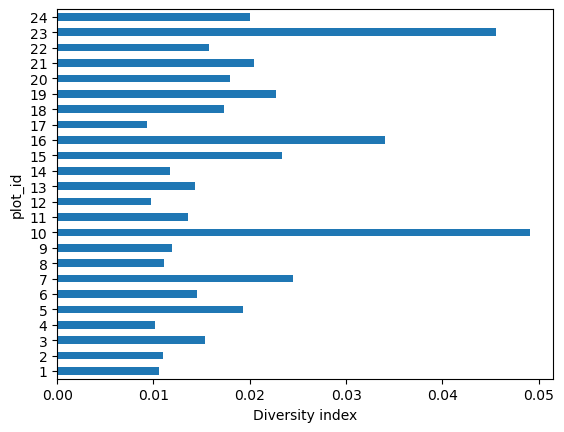

In [70]:
diversity_index['diversity'].plot(kind="barh")
plt.xlabel("Diversity index")

# ❗Key Points


- Pandas’ merge and concat can be used to combine subsets of a DataFrame, or even data from different files.

- `join` function combines DataFrames based on index or column.

- Joining two DataFrames can be done in multiple ways (left, right, and inner) depending on what data must be in the final DataFrame.

- `to_csv` can be used to write out DataFrames in CSV format.
